# Super Resolution

This code is the main interface to try our implementation of the super resolution.

**N.B.** It is possible to try a previously saved model by launching the cells for testing and all the required above, but without the training cell.

<span style="color:red">**TODO** The models below have all been generated but only with 2 epochs and it's not very efficient. We should try with more.</span>

In [1]:
from pathlib import Path

import numpy as np
from PIL import Image
from random import randint

from environment import DATA_DIR, OUTPUT_DIR
from test import sr_test
from train import sr_train
from utils import display_images

Testing image: "0012"


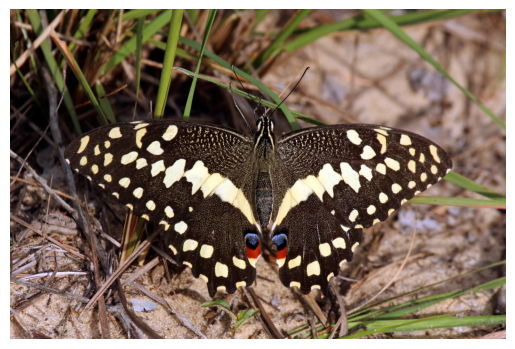

In [2]:
# Set the testing image
img_idx = str(randint(1, 800)).zfill(4)
img_path = f"{DATA_DIR}/{img_idx}.png"

# Load the high resolution image
hr_img = Image.open(img_path)

# Print the testing image index and the image
print(f"Testing image: \"{img_idx}\"")
display_images([hr_img])


## Scaling factor of 4

### Without pixel loss

#### Trained on 2 epochs

In [3]:
# Set the parameters
name = "sr_x4_pF_e2"
scaling_factor = 4
use_pixel_loss = False
num_epochs = 2

In [4]:
# Train the super resolution model
sr_train(name, scaling_factor,
         use_pixel_loss=use_pixel_loss,
         num_epochs=num_epochs)

Device: cuda
Epoch 1/2
101.98s - loss: 9.5818
Epoch 2/2
100.34s - loss: 5.1540
Trainig done in 202.77s.
Super resolution model "sr_x4_pF_e2" saved


Device: cuda
Low resolution and generated images for "0012" saved


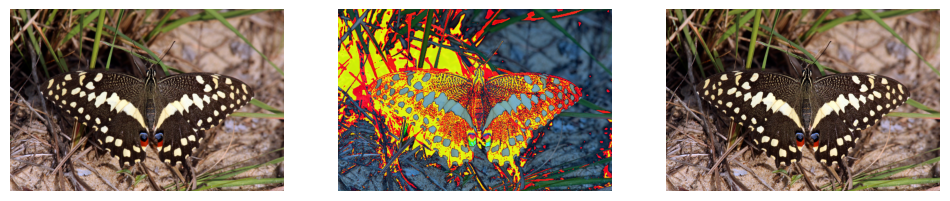

In [4]:
# Test the super resolution model on the testing image
lr_img, gen_img = sr_test(name, scaling_factor, img_path)
assert (np.array(gen_img.size) == scaling_factor * np.array(lr_img.size)).all()

# Save the images
output_dir = f"{OUTPUT_DIR}/{name}/{Path(img_idx).stem}"
Path(output_dir).mkdir(parents=True, exist_ok=True)
lr_img.save(f"{output_dir}/lr_img.jpg")
gen_img.save(f"{output_dir}/gen_img.jpg")
print(f"Low resolution and generated images for \"{img_idx}\" saved")

# Display the images
display_images([lr_img, gen_img, hr_img])

### With pixel loss

#### Trained on 2 epochs

In [5]:
# Set the parameters
name = "sr_x4_pT_e2"
scaling_factor = 4
use_pixel_loss = True
num_epochs = 2

In [7]:
# Train the super resolution model
sr_train(name, scaling_factor,
         use_pixel_loss=use_pixel_loss,
         num_epochs=num_epochs)

Device: cuda
Epoch 1/2
100.76s - loss: 7.9406
Epoch 2/2
100.81s - loss: 6.5237
Trainig done in 202.00s.
Super resolution model "sr_x4_pT_e2" saved


Device: cuda
Low resolution and generated images for "0012" saved


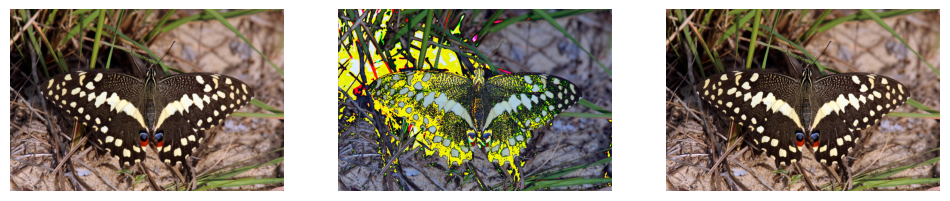

In [6]:
# Test the super resolution model on the testing image
lr_img, gen_img = sr_test(name, scaling_factor, img_path)
assert (np.array(gen_img.size) == scaling_factor * np.array(lr_img.size)).all()

# Save the images
output_dir = f"{OUTPUT_DIR}/{name}/{Path(img_idx).stem}"
Path(output_dir).mkdir(parents=True, exist_ok=True)
lr_img.save(f"{output_dir}/lr_img.jpg")
gen_img.save(f"{output_dir}/gen_img.jpg")
print(f"Low resolution and generated images for \"{img_idx}\" saved")

# Display the images
display_images([lr_img, gen_img, hr_img])

## Scaling factor of 8

### Without pixel loss

#### Trained on 2 epochs

In [7]:
# Set the parameters
name = "sr_x8_pF_e2"
scaling_factor = 8
use_pixel_loss = False
num_epochs = 2

In [10]:
# Train the super resolution model
sr_train(name, scaling_factor,
         use_pixel_loss=use_pixel_loss,
         num_epochs=num_epochs)

Device: cuda
Epoch 1/2
100.71s - loss: 5.8754
Epoch 2/2
100.64s - loss: 11.0339
Trainig done in 201.76s.
Super resolution model "sr_x8_pF_e2" saved


Device: cuda
Low resolution and generated images for "0012" saved


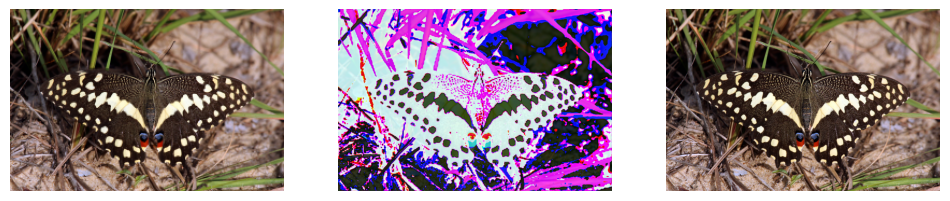

In [8]:
# Test the super resolution model on the testing image
lr_img, gen_img = sr_test(name, scaling_factor, img_path)
assert (np.array(gen_img.size) == scaling_factor * np.array(lr_img.size)).all()

# Save the images
output_dir = f"{OUTPUT_DIR}/{name}/{Path(img_idx).stem}"
Path(output_dir).mkdir(parents=True, exist_ok=True)
lr_img.save(f"{output_dir}/lr_img.jpg")
gen_img.save(f"{output_dir}/gen_img.jpg")
print(f"Low resolution and generated images for \"{img_idx}\" saved")

# Display the images
display_images([lr_img, gen_img, hr_img])

### With pixel loss

#### Trained on 2 epochs

In [9]:
# Set the parameters
name = "sr_x8_pT_e2"
scaling_factor = 8
use_pixel_loss = True
num_epochs = 2

In [13]:
# Train the super resolution model
sr_train(name, scaling_factor,
         use_pixel_loss=use_pixel_loss,
         num_epochs=num_epochs)

Device: cuda
Epoch 1/2
100.71s - loss: 9.1447
Epoch 2/2
100.75s - loss: 4.0788
Trainig done in 201.89s.
Super resolution model "sr_x8_pT_e2" saved


Device: cuda
Low resolution and generated images for "0012" saved


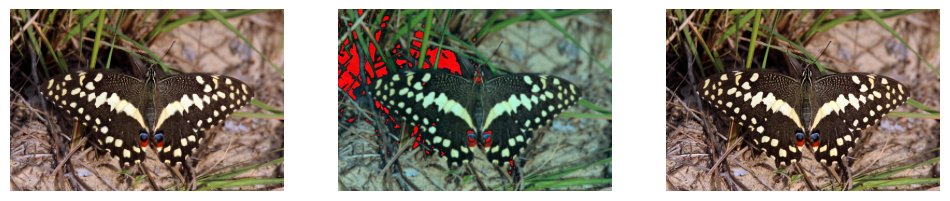

In [10]:
# Test the super resolution model on the testing image
lr_img, gen_img = sr_test(name, scaling_factor, img_path)
assert (np.array(gen_img.size) == scaling_factor * np.array(lr_img.size)).all()

# Save the images
output_dir = f"{OUTPUT_DIR}/{name}/{Path(img_idx).stem}"
Path(output_dir).mkdir(parents=True, exist_ok=True)
lr_img.save(f"{output_dir}/lr_img.jpg")
gen_img.save(f"{output_dir}/gen_img.jpg")
print(f"Low resolution and generated images for \"{img_idx}\" saved")

# Display the images
display_images([lr_img, gen_img, hr_img])